# TP 3 : LINEAR REGRESSION

## EXERCICE 1 : Le jeu de données contaminé par le robot 

In [49]:
import pandas as pd
import numpy as np
import scipy.stats as sc
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import random
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

### Question 1

Importer la base de données data_dm3.csv disponible depuis le lien https://bitbucket.org/
portierf/shared_files/downloads/data_dm3.csv. La dernière colonne est la variable à expliquer.
Les autres colonnes sont les variables explicatives. Préciser le nombre de variables explicatives
et le nombre d’observations.

In [3]:
data = pd.read_csv("https://bitbucket.org/portierf/shared_files/downloads/data_dm3.csv", sep = ",", header = None)

In [4]:
explicated_var = pd.DataFrame(data.iloc[ : ,-1])
explicative_var = pd.DataFrame(data.drop(data.columns[-1], axis= 1))

In [5]:
print("Nombre d\'observations : ", explicative_var.shape[0], "\nNombre de variables explicatives : ", explicative_var.shape[1] )

Nombre d'observations :  442 
Nombre de variables explicatives :  210


### Question 2 

Les variables explicatives sont-elles centrées ? Normalisées ? Qu’en est-il de la variable à expliquer ?
Tracer un scatter plot de la base de données avec 4 covariables prises au hasard et la variable à
expliquer (un scatterplot regroupe les graphes de chacune des variables en fonction de chacune des
autres). Commenter les graphiques obtenus.

In [6]:
eps = 10**(-4) # Set a eps to compare to 0
if (all(abs(explicative_var.mean()) < eps)):
    print('Explicative variables are centered')
else: 
    print('Explicative variables not centered')
    
if (all(explicative_var.var() - 1 < 10**-2)):
    print('Explicative variables are standardized')
else: 
    print('Explicative variables not standardized')


Explicative variables are centered
Explicative variables are standardized


In [7]:
eps = 10**(-4) # Set a eps to compare to 0
if (all(abs(explicated_var.mean()) < eps)):
    print('Explicated variables are centered')
else: 
    print('Explicated variables not centered')
    
if (all(explicated_var.var() - 1 < 10**-2)):
    print('Explicated variables are standardized')
else: 
    print('Explicated variables not standardized')


Explicated variables not centered
Explicated variables not standardized


<IPython.core.display.Javascript object>


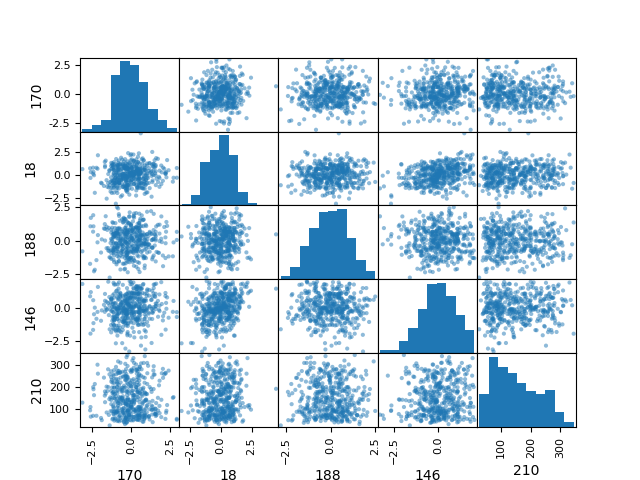

In [8]:
%matplotlib notebook
# Get 4 different columns randomly
random.seed(1234) # for reproducibility
rand_col = np.random.randint(0, len(explicative_var.columns), [4])
df_toplot = pd.concat([pd.DataFrame(explicative_var[rand_col]), explicated_var], axis = 1)
scatter_matrix(df_toplot)
plt.show()

Comment : TO DO

### Question 3

Echantillon d’apprentissage et de test. Créer 2 échantillons : un pour apprendre le modèle X train ,
un pour tester le modèle X test . On mettra 20% de la base dans l’échantillon ’test’. Donner les tailles
de chacun des 2 échantillons.

In [105]:
rnd_seed = 12234
X_train, X_test, y_train, y_test = train_test_split(explicative_var, explicated_var, test_size = 0.20, random_state = rnd_seed)

In [56]:
# Get all to dataframe
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [10]:
# Get sample size :
n_test = X_test.shape[0]
n_train = X_train.shape[0]
print('Train sample is ', n_train, '\nTest sample is ', n_test)

Train sample is  353 
Test sample is  89


### Question 4 

Donner la matrice des correlations calculée sur X train . Tracer le graphe de la décroissance des
valeurs propres de la matrice de corrélation. Expliquer pourquoi il est légitime de ne garder que les
premières variables de l’ACP. On gardera 60 variables dans la suite.

<IPython.core.display.Javascript object>


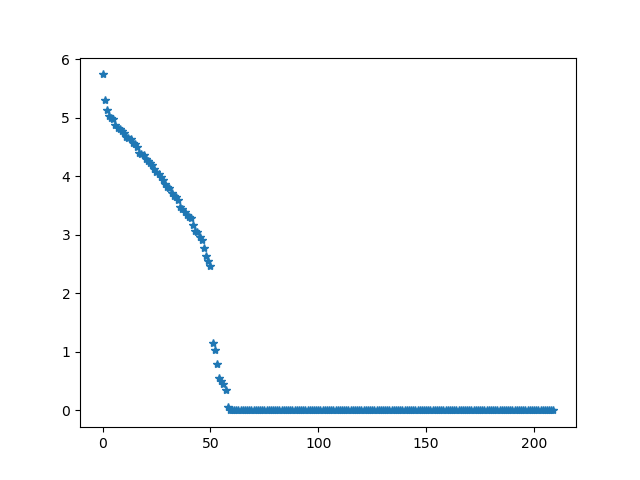

/home/margaux/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [11]:
corr = X_train.corr()
eigenval, eigenvect = np.linalg.eig(corr)
plt.figure()
sorted_eigenval = eigenval.real.sort()
plt.plot(sorted(eigenval, reverse=True), '*')
plt.show()

We observe that from the 60th eigenvalue, they are virtually equal to 0. Which means the last variables have no impact in the global variance. 

In [118]:
# ACP analysis
a = PCA(n_components=60)
a.fit(explicative_var)
X_new = pd.DataFrame(a.fit_transform(explicative_var))
X_new_train, X_new_test = train_test_split(X_new, test_size = 0.20, random_state = rnd_seed)

### Question 5

Suivant les observations de la question (Q4), appliquer la méthode de "PCA before OLS" qui
consiste à faire une ACP avant la régression. Faire une régression linéaire (avec intercept), puis
tracer les valeurs des coefficients (hors intercept). Sur un autre graphique, faire de même avec la
méthode des moindres carrés classique.

Intercept is  [151.61209879]


<IPython.core.display.Javascript object>


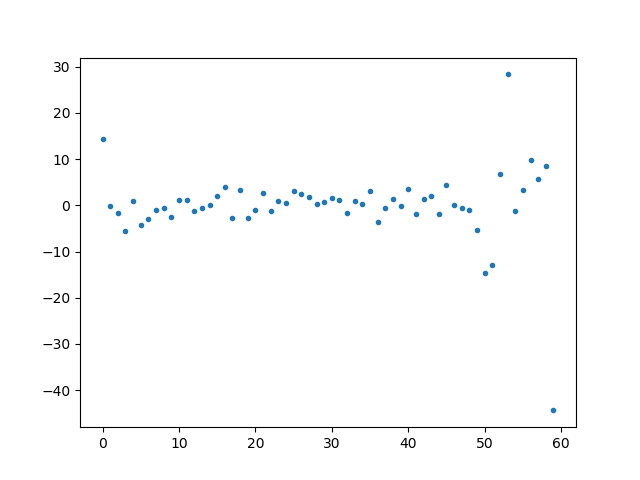

In [120]:
reg_pca_before_ols = LinearRegression().fit(X_new_train, y_train)
print("Intercept is ",reg_pca_before_ols.intercept_)
plt.figure()
plt.plot(reg_pca_before_ols.coef_[0], '.')
plt.show()


With classical OLS (all variables)

Intercept is  [150.72547805]


<IPython.core.display.Javascript object>


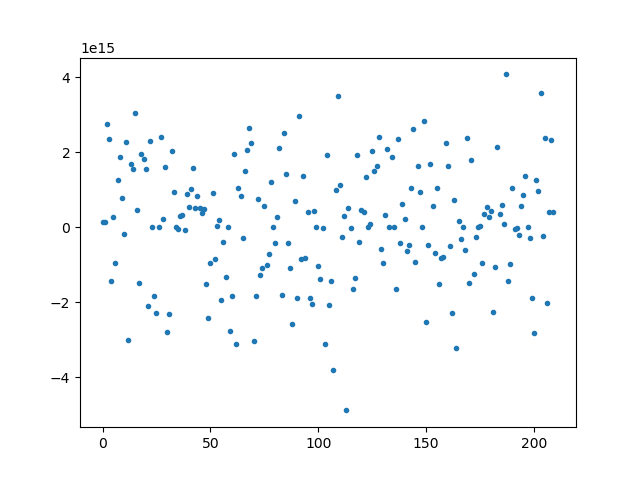

In [121]:
reg_ols = LinearRegression().fit(pd.DataFrame(X_train), pd.DataFrame(y_train))
print("Intercept is ",reg_ols.intercept_)
plt.figure()
plt.plot(reg_ols.coef_[0], '.')
plt.show()

### Question 6

Donner les valeurs des intercepts pour les 2 régressions précédentes. Donner la valeur moyenne
de la variable Y (sur le train set). Les intercepts des 2 questions sont-ils égaux ? Commenter.
Uniquement pour cette question, centrer et réduire les variables après ACP (de petite dimension).
Faire une régression avec ces variables et vérifier que l’intercept est bien égal à la moyenne de Y
sut le train.

In [122]:
print("Intercept using PCA before OLS is ", reg_pca_before_ols.intercept_)
print("Intercept using OLS is ", reg_ols.intercept_)
print("Mean of y in train set is ", y_train[210].mean())

Intercept using PCA before OLS is  [151.61209879]
Intercept using OLS is  [150.72547805]
Mean of y in train set is  152.6317280453258


The two intercepts are similar but slightly different because one regression uses 60 explicative variables, the other 210. It means some explicative variables used in OLS regression reduce the impact of the intercept.
The intercepts are close to the mean of Y.

In [124]:
# Center and reduce ACP variables
ACP_normalized = preprocessing.scale(X_new_train)
reg_pca_norm = LinearRegression().fit(ACP_normalized, pd.DataFrame(y_train))
print("Intercept found is ", reg_pca_norm.intercept_[0]," and Y mean is ", y_train[210].mean())

Intercept found is  152.6317280453258  and Y mean is  152.6317280453258


The two values correspond. The intercept coresponds to the mean of the variable.

### Question 7

Pour les 2 méthodes (OLS et PCA before OLS) : Tracer les résidus de la prédiction sur l’échantillon
test. Tracer leur densité (on pourra par exemple utiliser un histogramme). Calculer le coefficient de
détermination sur l’échantillon test. Calculer le risque de prédiction sur l’échantillon test.

In [128]:
# Coefficient de détermination
print('Coef de détermination sur OLS : ', reg_ols.score(X_test, y_test))
print('Coef de détermination sur PCA before OLS : ', reg_pca_before_ols.score(X_new_test, y_test))


Coef de détermination sur OLS :  0.25619847178714084
Coef de détermination sur PCA before OLS :  0.4338148561924201


<IPython.core.display.Javascript object>


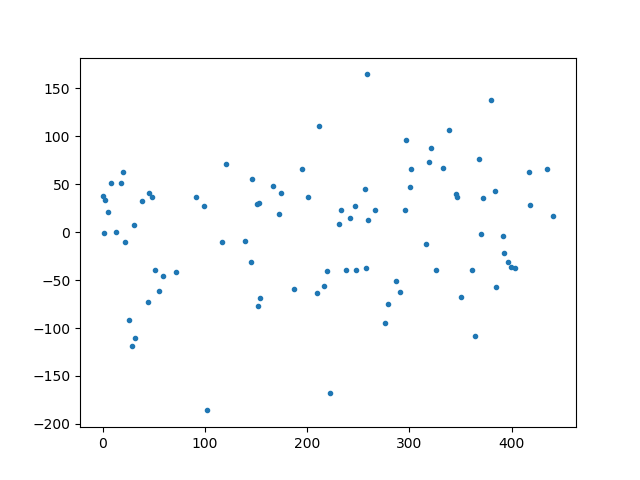

In [85]:
# OLS
predictions_OLS = reg_ols.predict(X_test)
residuals_OLS = predictions_OLS - y_test
plt.figure()
plt.plot(residuals_OLS, '.')
plt.show()


<IPython.core.display.Javascript object>


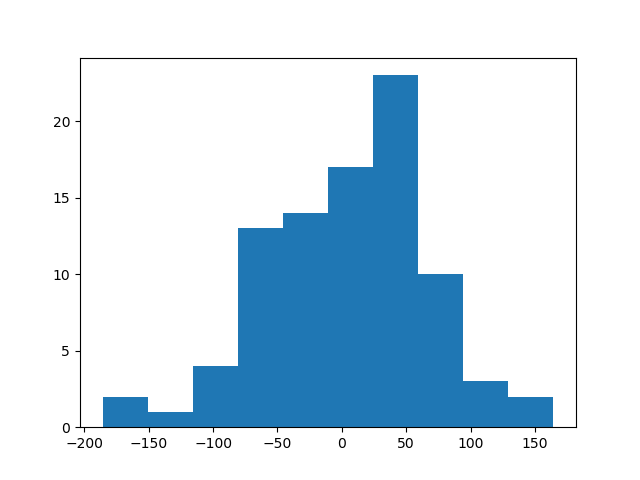

In [93]:
plt.figure()
plt.hist(residuals_OLS[210])
plt.show()

### Question 8 

Appliquer la méthode de forward variable sélection. On pourra utiliser la statistique du test de
nullité du coefficient (comme vu en cours). Pour l’instant, on ne met pas de critère d’arret sur la
méthode. C’est à dire que l’on ajoute une variable à chaque étape jusqu’à retrouver la totalité des
variables. Afficher l’ordre de séléction des variables.

### Question 9 

Critère d’arrêt : On décide d’arrêter lorsque la p-valeur dépasse 0.1. Illustrer la méthode en donnant
(i) les 3 graphes des statistiques obtenues lors de la sélection de la 1er, 2eme et 3eme variables (en
abscisse : l’index des variables, en ordonné : la valeur des stats) , (ii) le graphe des 50 premières
p-valeurs (dont chacune est associée à la variable sélectionnée). Sur ce même graphe, on tracera la
ligne horizontale d’ordonnée 0.1. Enfin on donnera la liste des variables sélectionnées.

### Question 10 

Appliquer OLS sur les variables sélectionnées. Donner le risque de prédiction obtenu l’échantillon
test et le comparer à ceux de OLS et PCA before OLS.

### Question 11 

Afin de préparer la validation croisée, séparer l’échantillon train en 4 parties (appelées ”folds”) de
façon aléatoire. On affichera les numéros d’échantillon sélectionnés dans chaque fold.

### Question 12 

Appliquer la méthode de la régression ridge. Pour le choix du paramètre de régularisation, on fera
une validation croisée sur les ”folds” définies lors de la question précédente. A tour de rôle chacune
des ”folds” servira pour calculer le risque de prédiction alors que les autres seront utilisées pour
estimer le modèle. On moyennera ensuite les 4 risques de prédictions. On donnera la courbe du
risque de validation croisée en fonction du paramètre de régularisation (on veillera à bien choisir
l’espace de définition pour le graphe). Donner le paramètre de régularisation optimal et la valeur
du risque sur le test.

### Question 13 

A l’aide de la fonction lassoCV de sklearn, choisir le paramètre de régularisation du LASSO. Donner
le risque de prédiction associé.

### Question 14 

Donner les variables selectionées par le lasso. Combien y-en a t-il ? Appliquer la méthode OLS aux
variables sélectionnées. Cette méthode est appelé Least-square LASSO.

### Question 15 

Cette dernière question est un question d’ouverture vers une approche non-linéaire. En utilisant les
variables séléctionées par le LASSO (Q13) ou par la méthode forward (Q9), mettre au point une
méthode de regression non-linéaire. On apprendra les différents paramètres par validation croisée
et l’on donnera la valeur du risque de prédiction calculé sur l’échantillon test. Des performances
moindres par rapport à OLS peuvent se produire. Commenter.